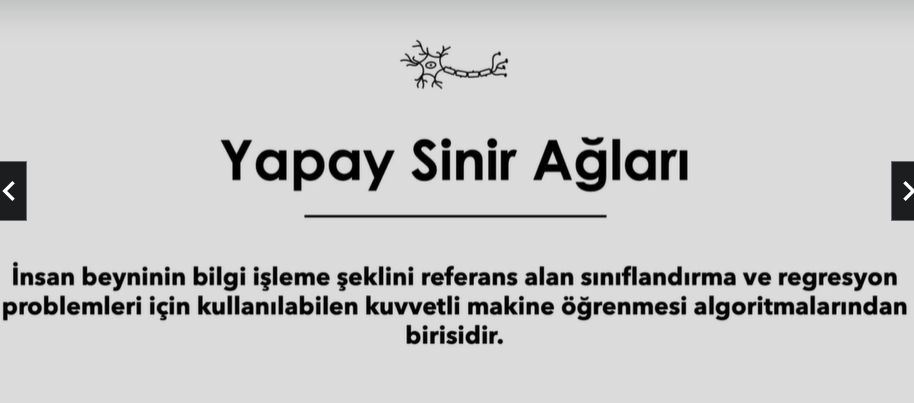

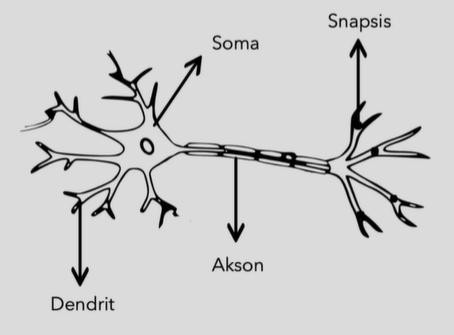

girdiler(regresyon bölümündeki bagımsız degişkenlerin degerleri)=dentritler
,toplama fonksiyonu=soma
,aktivasyon fonksiyonu =sinanpsis
,net girdi =akson

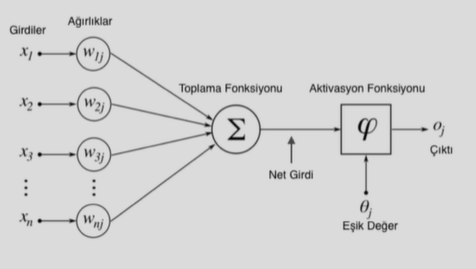

degişkenlerin agırlıklar ile çarpılarak çıktıya olan etkilerine bakıyoruz 

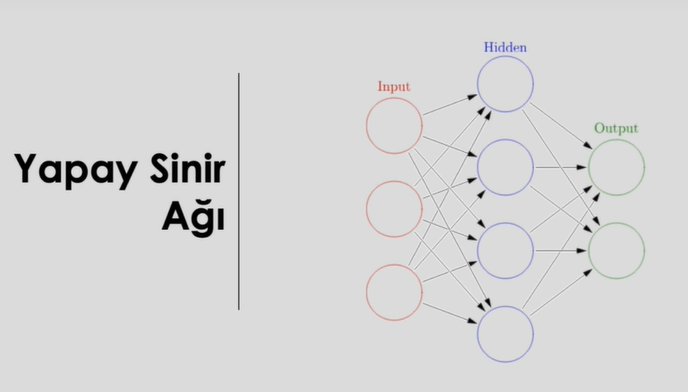

input çıktı katmanı,
hidden gizli katmanı,
output çıktı katmanı

geriye yayınımlı ,delta kullanır

pls=tahminler gözlenmeyen degişkenler aracılıgı ile modelleniyor,yani elimizde katsayıların bunlar dogrusal kombinasyonu elde edilip gizil katmanlar aracılıgı ile tahminler yapılıyor 

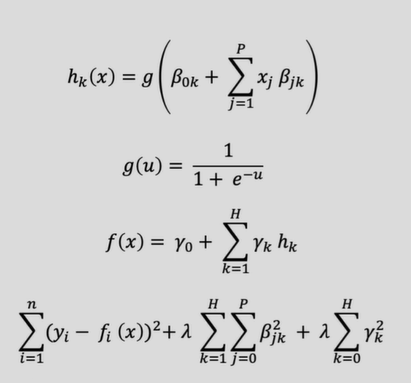

gerçek degerler ve tahmin edilen degerler burada olacak 

ridge ye benzer degerler içerir

bu denklem global degildir,yani sonuclar degişik çıkabilir

overfit etmeye meyillidir

yapay sinir agı regresyonun bir türevi,farkı nedir ise katmanlar var(katmanlar;bizim degişkenlerimizin dogrusal kombinasyonlarını farklı katmanlarda degişken setleri oluşturan bir yapı söz konusu  )

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

ysa degişken standartlaştırma işlemi yapılmaktadadır 

In [4]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_scaled=scaler.transform(X_train)

In [9]:
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.neural_network import MLPRegressor

In [11]:
mlp_model=MLPRegressor().fit(X_train_scaled,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
mlp_model

MLPRegressor()

In [19]:
mlp_model.n_layers_
#katman sayısını verir,genel framework u ifade eder

3

In [20]:
mlp_model.hidden_layer_sizes
#gizli katman sayısını verir,genel frameworkun gizli katmanlarının elemanlarını ifade eder

(100,)

# YSA-Tahmin

In [21]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 5.12610699, 34.93278837, 31.35754838,  6.69432696,  4.16140467])

In [22]:
#ilkel test hatasın hesaplayalım
y_pred=mlp_model.predict(X_test_scaled)

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

663.033002536151

# YSA -model tuning

In [26]:
mlp_model

MLPRegressor()

In [34]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

#'hidden_layers_sizes=>2 katmanlı ve 3 katmanlı bir ag topolojisi bunlardır 
#activision=gezilçek olan bir paramtre seti


In [35]:
mlp_cv_model=GridSearchCV(mlp_model,mlp_params,cv=10)

In [36]:
mlp_cv_model.fit(X_train_scaled,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_

GridSearchCV(cv=10, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [37]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [39]:
mlp_tuned=MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,50,150))

In [40]:
mlp_tuned.fit(X_train_scaled,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [41]:
y_pred=mlp_tuned.predict(X_test_scaled)

In [42]:
np.sqrt(mean_squared_error(y_test,y_pred))

362.0027367003935

# Karar Ağaçları

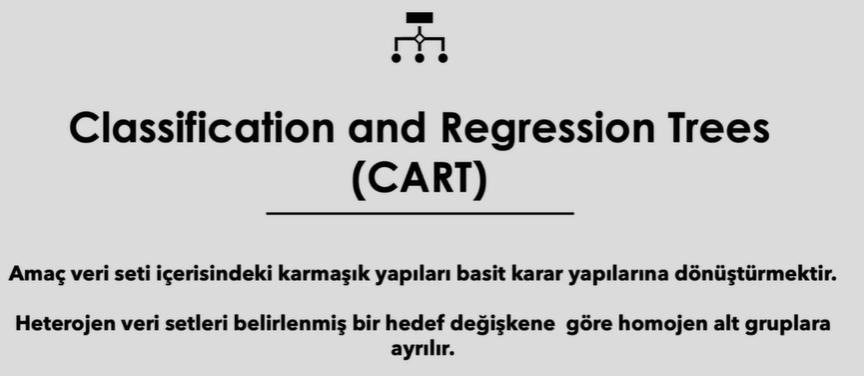

hem sınıflandırma hem de regresyon için kullanılabilmektedir

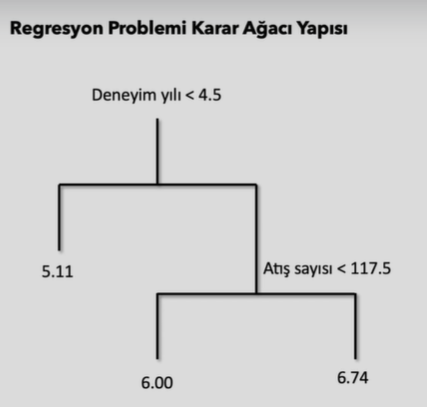

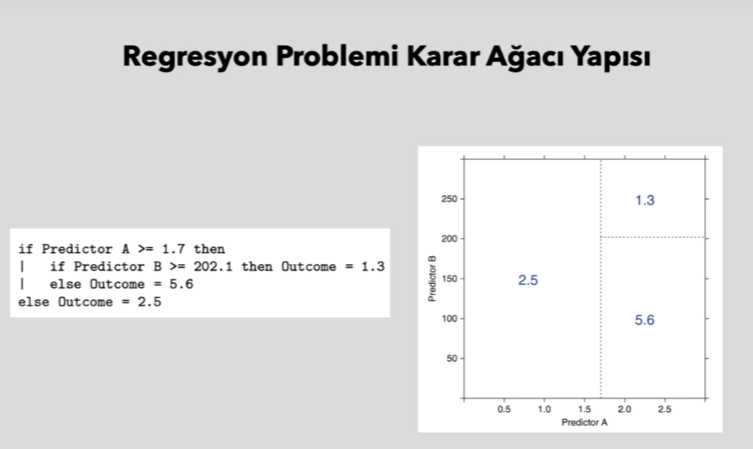

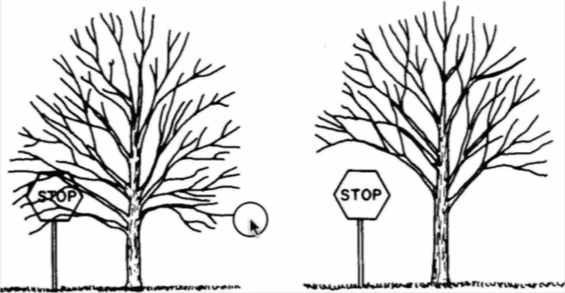

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [5]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [14]:
cart_model=DecisionTreeRegressor()

In [15]:
cart_model

DecisionTreeRegressor()

In [16]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

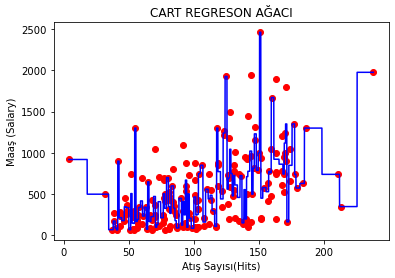

In [17]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
#görebilmek için grid oluşturuyoruz
plt.scatter(X_train, y_train, color = 'red') 
#salary ve hit degişkenleri için scotter plot oluşturuyoruz
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
#grid yardımı ile graifige ekleme işlemini yapıcaz
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [21]:
# !pip install skompiler

In [24]:
from skompiler import skompile

In [26]:
print(skompile(cart_model.predict).to('python/code'))

ModuleNotFoundError: No module named 'astor'

# Cart Tahmin

In [ ]:
model implimente işlemi bu şekilde yapılır 

In [28]:
x=[91]

In [29]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

yukarıdaki python kodudur,daha önceki modellerin cart agaç versiyonu budur 

In [30]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [32]:
cart_model.predict([[91]])

array([125.])

In [67]:
#ilkel test hatamıza bakalım

y_pred=cart_model.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(X_test,y_pred))

563.8357945217492

# Model Tuning 

In [69]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [78]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [79]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [80]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [81]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [83]:
#hiper paramtre optimizasyonu biraz risklidir

In [86]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76)

In [87]:
cart_tuned.fit(X_train ,y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [88]:
y_pred=cart_tuned.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test,y_pred))

423.406689243066

# Bagging Tree

birden fazla agaçı aynı anda oluşturarak,bir tahmin yaklaşımı sergiler 

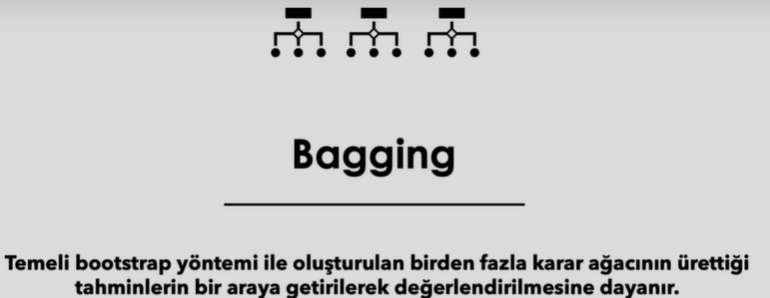

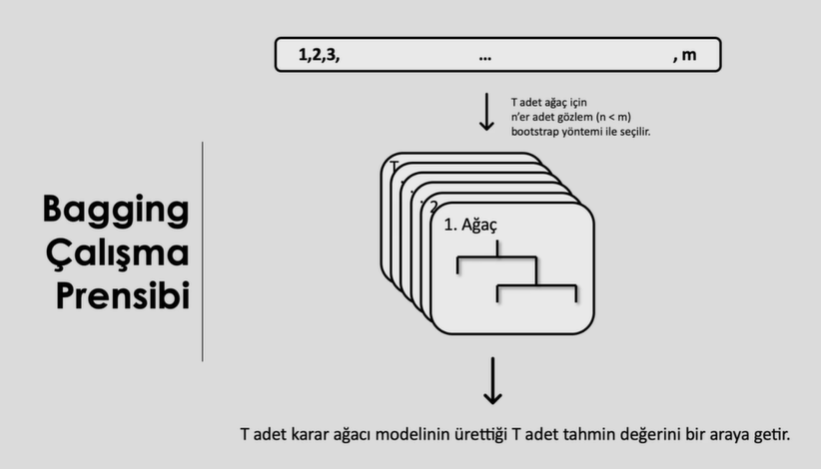



In [90]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [94]:
bag_model=BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [95]:
bag_model.n_estimators

10

In [97]:
bag_model.estimators_
#aşagıdakiler herbiri agaç birbirinden farklı 10 agaç fit edilmiş 

[DecisionTreeRegressor(random_state=194828276),
 DecisionTreeRegressor(random_state=1128701581),
 DecisionTreeRegressor(random_state=1034236755),
 DecisionTreeRegressor(random_state=1597105812),
 DecisionTreeRegressor(random_state=663937411),
 DecisionTreeRegressor(random_state=106544690),
 DecisionTreeRegressor(random_state=1581299244),
 DecisionTreeRegressor(random_state=1668578314),
 DecisionTreeRegressor(random_state=113151070),
 DecisionTreeRegressor(random_state=151379318)]

In [100]:
#kaç tane model bilgisine erişmek istedigimiz söylemek istersek
bag_model.estimators_samples_
#herbir agaçtaki örnekleri alaçak 

[array([ 33,  70, 109,  16, 159, 100, 156, 156, 164, 143,  36,  46, 135,
          4, 124,  26,  27,  71,  85,  94, 177, 178,  40, 173,  91,   9,
         28, 122,  36, 114,  88,   6, 101,  18,  26,  23,  40, 125, 191,
         12, 138, 165, 142,  85,  77, 125,  75,  14,  12,  62,  47,  85,
         73,  31,   4, 163, 101,  97,  26,  59, 123, 162,  35,   6, 187,
          9,  34, 196, 124, 195,  84, 189, 191,  28, 170, 144, 139,  55,
        110,  87, 158,  25,  69, 171, 114,  98, 113,  22, 191,   4,  44,
         58, 155, 167, 177,  25, 133,  89,  60,   1,  74,  30,   9, 135,
         16, 186,  34,  92, 141, 105,   8,  44, 183, 110,  35,   0,  87,
         26, 112,  37,   4,  30, 166,  10,  93,  92, 155, 165,  14,   5,
        168,  78,  56,   9,  80,  13,  57,  11,  83, 170,  34,  53,  87,
         45, 119,  63,  33, 175, 156,  90, 113, 167, 155, 156,  75, 100,
        154, 180, 117,  57, 195,  17,  75, 139,  61, 105, 123, 103, 161,
         50,  85, 127,  26, 144,  33, 153, 138,  39

In [101]:
#herbir agaçın bagımzıs degişkenlerine ulaşmak istersek 
bag_model.estimators_features_

[array([16, 12,  9,  5, 13,  4,  1,  5,  3,  3, 15,  2,  9, 18, 18,  0,  0,
         1, 14]),
 array([13, 13,  8,  6,  8,  7, 18,  6,  0,  4,  8,  5, 18,  2, 17, 12, 17,
         5, 14]),
 array([15,  9,  9, 13, 11,  7,  9,  6,  0, 16, 18, 16,  1, 15, 10, 18,  3,
         2,  7]),
 array([12,  7,  4, 12, 13,  4, 15, 17,  0,  4, 14, 17,  2, 17, 17,  7,  6,
        18, 16]),
 array([ 3, 13, 16, 10,  9, 18,  5,  1, 12, 15, 16,  4,  1, 16, 12,  9, 10,
        10,  0]),
 array([18,  3,  3, 11,  1, 16,  8, 18, 15,  4,  8, 13,  9,  4,  1, 12, 12,
        14, 14]),
 array([12,  9, 11,  8, 18, 14, 15,  8,  7, 16,  1, 15,  3,  4, 16,  3, 12,
        18, 17]),
 array([10, 15,  7,  9,  7,  1, 16, 10, 14, 18, 12, 15,  4,  5,  1,  4,  8,
        11, 15]),
 array([ 5,  8, 18, 14, 17,  3, 16, 16,  3,  8, 12,  5,  2, 16,  5,  5,  7,
         0,  3]),
 array([13, 15, 10,  0, 17, 15, 15, 10, 17, 18,  8,  8,  1, 15, 17, 16, 14,
        14, 10])]

In [102]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=194828276)

# BaggedTree-Tahmin

In [104]:
y_pred=bag_model.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(y_test,y_pred))

366.9109955401188

In [108]:
iki_y_pred=bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [109]:
np.sqrt(mean_squared_error(y_test,iki_y_pred))

473.37836171233533

In [110]:
#agaçların herbirine ayrı ayrı erişip ayrı ayrı gözlem yapabiliriz

# BaggedTree-Model Tuning

baggingi aslında bir metodoloji olarak görmek gerekiyor

bootstrap birleştirmeleri yapmak demek

In [111]:
bag_params={"n_estimators":range(2,20)}

In [112]:
bag_cv_model=GridSearchCV(bag_model,bag_params,cv=10)

In [113]:
bag_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [114]:
bag_cv_model.best_params_

{'n_estimators': 14}

In [115]:
bag_tuned=BaggingRegressor(n_estimators=14,random_state=45)

In [116]:
bag_tuned.fit(X_train,y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [118]:
y_pred=bag_tuned.predict(X_test)

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))

347.50463424981314

# Random Forest

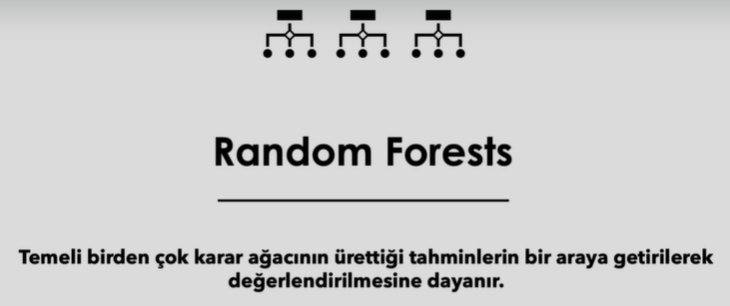

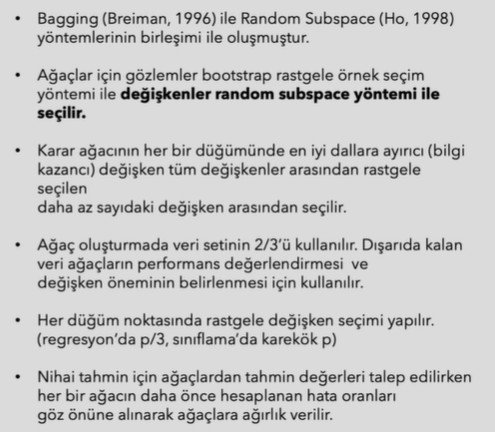

# Rf- Model

In [121]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rf_model=RandomForestRegressor(random_state=42)

In [124]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

# Tahmin

In [125]:
rf_model.predict(X_test)[0:5]

array([ 740.62167,  895.99497, 1184.695  ,  139.65167,  634.75833])

In [126]:
y_pred=rf_model.predict(X_test)

In [129]:
np.sqrt(mean_squared_error(y_test,y_pred))

345.00286717448006

# RF-Model Tuning

In [131]:
rf_params={'max_depth':list(range(1,10)),
          'max_features':[3,5,10,15],
          'n_estimators':[100,200,500,1000,2000]}

In [132]:
rf_model=RandomForestRegressor(random_state=42)

In [133]:
rf_cv_model=GridSearchCV(rf_model,
                        rf_params,
                        cv=10,
                        n_jobs=-1)

In [136]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [138]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

In [139]:
#final modelimnizi oluşturalım 


In [141]:
rf_tuned=RandomForestRegressor(max_depth=8,
                               max_features=3,
                               n_estimators=200)

In [148]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [149]:
y_pred=rf_tuned.predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_test,y_pred))

340.24542429567725

In [152]:
#degişkenlerin önemine ve performansına göre seçme işi
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                         index=X_train.columns)

Text(0.5, 0, 'Degişkenlerin Önem Düzeylerli')

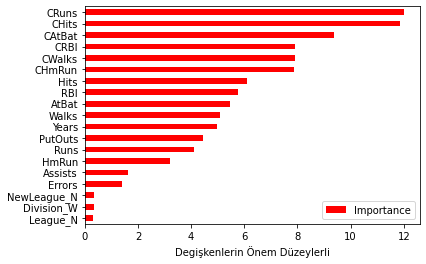

In [153]:
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",color="r")

plt.xlabel("Degişkenlerin Önem Düzeylerli")

# Gradient Boosting Machines

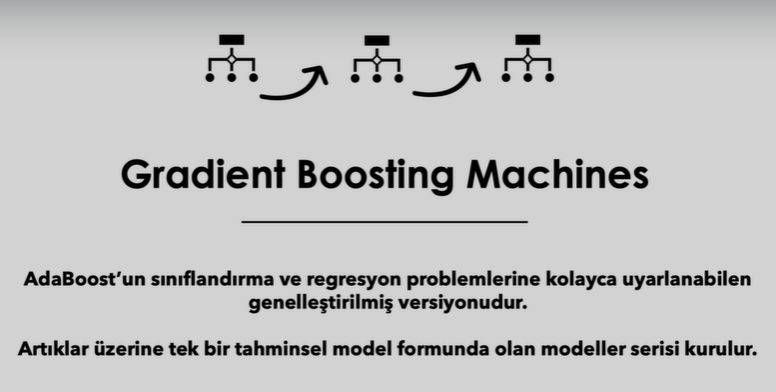

zayıf ögrenicileri bir araya getirip güçlü bir ögrenici ortaya çıkarmak fikrine dayanır 

zayıf sınıflandırıcıların bir araya gelerek güçlü sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır 

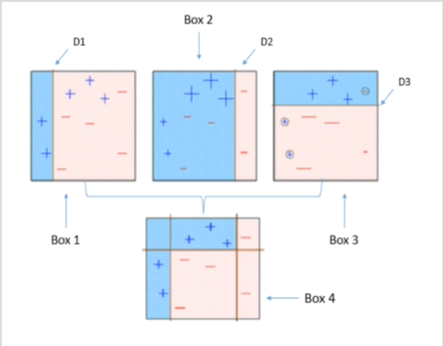

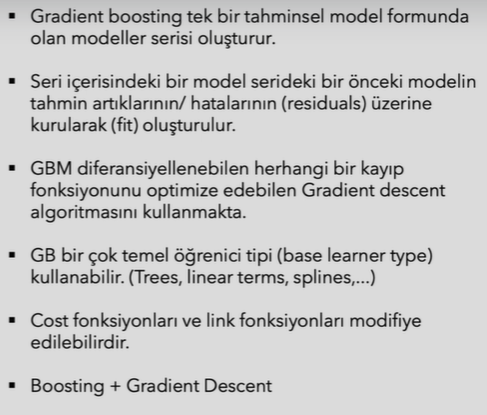

# GBM model

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [9]:
gbm_model= GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

# GBM-tahmin

In [11]:
y_pred=gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.7825961065585

# GBM-model Tuning

In [12]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [14]:
gbm=GradientBoostingRegressor()
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  7.5min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [18]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [21]:
gbm_tuned =GradientBoostingRegressor(learning_rate=0.1,
                                    max_depth=5,
                                    n_estimators=200,
                                    subsample=0.5)
gbm_tuned=gbm_tuned.fit(X_train,y_train)

In [22]:
y_pred=gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

313.5421556913574

In [25]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Degişken Önem Düzeyleri')

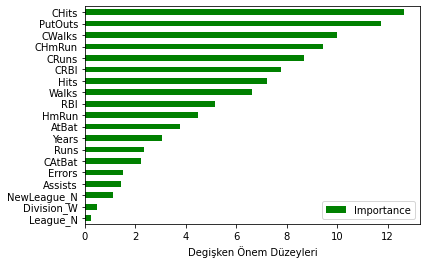

In [27]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="g")

plt.xlabel("Degişken Önem Düzeyleri")

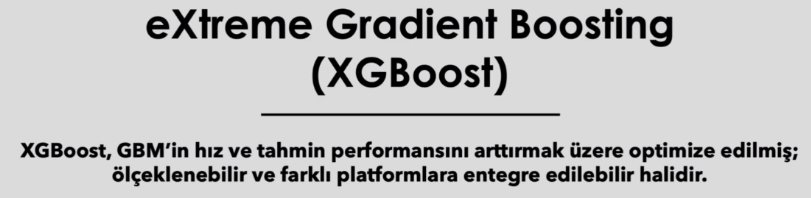

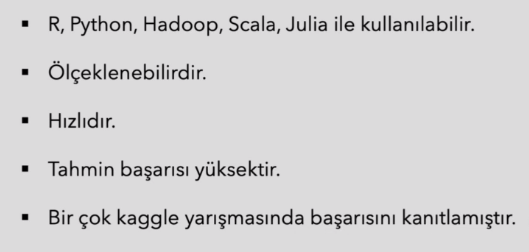

# XGBoost

In [19]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [2]:
!pip install xgboost

In [3]:
#xgboostun kendi yapısını kullanırsak daha verimli çalışabilir
import xgboost as xgb

In [8]:
DM_train=xgb.DMatrix(data=X_train,label=y_train)
DM_test=xgb.DMatrix(data=X_test,label=y_test)

In [20]:
from xgboost import XGBRegressor

In [11]:
xgb_model=XGBRegressor().fit(X_train,y_train)

# XGBoost-Tahmin

In [12]:
y_pred=xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

355.46515176059927

# XGBoost - Model Tuning

In [13]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [15]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  3.4min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [17]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [24]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [15]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

NameError: name 'xgb_tuned' is not defined

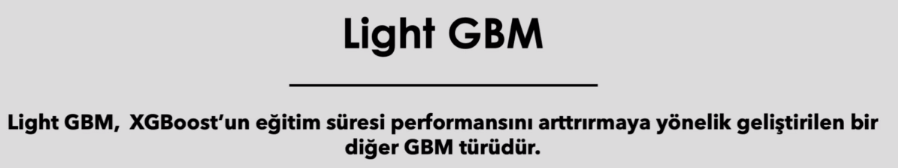

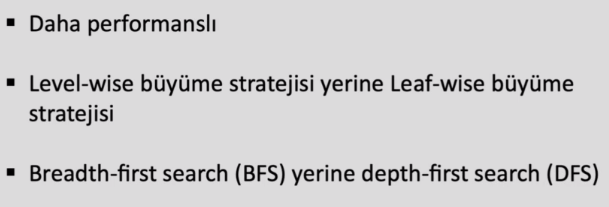

xgboost un ögrenme/egitim süresi hızına yönlik daha iyileştirmeleri var

en temel farklılıklar sprit işleminde karşımıza çıkıyor

agaç sistemini düşünürserk xgboost daha geniş kapsamlı ilk arama yapar,light 
GBM ise derinlenmesine ilk arama yapar 

In [11]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [27]:
!pip install lightgbm

In [3]:
from lightgbm import LGBMRegressor

In [4]:
#eger yukarıdaki işlemde hata verilirse conda ile de yükleme de yapabiliriz
#conda install -c conda-forge lightgbm şeklinde yükleme yapılabilir



In [12]:
lgbm=LGBMRegressor()
lgbm_model=lgbm.fit(X_train,y_train)

#model kurma işlemini yapmış olduk 

# LightGBM-Tahmin

In [13]:
lgbm_model.predict(X_test,
                   num_iteration=lgbm_model.best_iteration_)

array([ 747.27577776,  696.56496327, 1374.39525293,  226.10183768,
        490.34818367,  336.64087163,  244.51392282,  111.26504013,
        926.39143875,  480.69726555,  833.68715554,  959.11510008,
        561.11059387,   11.044985  ,  316.43085159, 1046.63003696,
        949.81852398,  139.07151089,  887.86456737,  332.24159329,
        271.41232292,  966.21414836,  665.68774684,  578.30645351,
        539.6540439 ,  120.75243756,  666.04756043,  383.95478905,
        790.34162095,  157.0221543 ,  240.28312963,  195.28663262,
        592.38126362,  133.14658422,  277.19753471, 1256.0788298 ,
       1238.8345811 ,  128.39790305,  175.1571059 ,  521.09030024,
         91.04120916,   44.38359303,  624.31868447,  690.83444014,
       1237.69044786,  628.63742068,  589.04666178,   -8.51229917,
        146.76683487,  880.37654108,  615.08333567,  398.61718452,
        781.64995162,  166.78918003,   69.23084248,  892.75436957,
        671.1786227 ,  676.08054412,  229.40176823, 1238.83458

In [16]:
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

# Model-Tuning

çalıştıgımız veri setine göre diger işlemlerde daha hızlı çalıştı

süre olarak hızlanmış performans olarak iyileşme olmamış

In [17]:
lgbm_model

LGBMRegressor()

In [18]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [21]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  3.2min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [22]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [24]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [28]:
y_pred=lgbm_tuned.predict(X_test)

NameError: name 'lgbm_tuned' is not defined

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

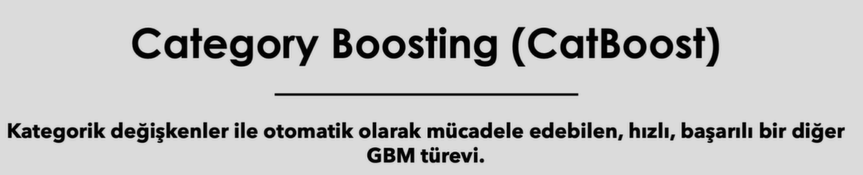

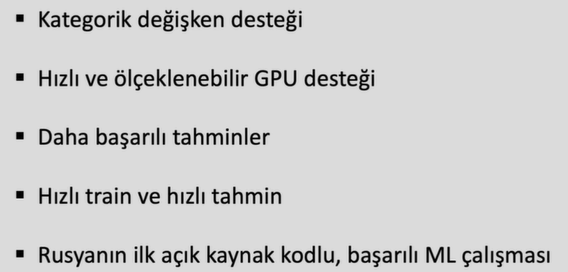

# CatBoost -Model

In [36]:
#yeri setini okuyup,eksik gözlemleri çıkarıp,dumi degişkenler oluşturup,test ve train ayrımı yapıp tamalıyoruz 
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [31]:
!pip install catboost

In [34]:
from catboost import CatBoostRegressor

In [38]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 1.27ms	remaining: 1.27s
1:	learn: 431.3923642	total: 2.27ms	remaining: 1.13s
2:	learn: 424.8820360	total: 3.42ms	remaining: 1.14s
3:	learn: 418.2514904	total: 4.46ms	remaining: 1.11s
4:	learn: 412.6394021	total: 5.48ms	remaining: 1.09s
5:	learn: 406.6247020	total: 6.51ms	remaining: 1.08s
6:	learn: 400.5321206	total: 7.43ms	remaining: 1.05s
7:	learn: 394.6683437	total: 8.43ms	remaining: 1.04s
8:	learn: 388.2496484	total: 9.37ms	remaining: 1.03s
9:	learn: 382.9448842	total: 10.3ms	remaining: 1.02s
10:	learn: 377.2600080	total: 11.3ms	remaining: 1.01s
11:	learn: 372.4829606	total: 12.2ms	remaining: 1s
12:	learn: 366.6823437	total: 13.2ms	remaining: 1s
13:	learn: 362.6076230	total: 14.1ms	remaining: 993ms
14:	learn: 358.0107745	total: 15.3ms	remaining: 1.01s
15:	learn: 353.2802665	total: 16.5ms	remaining: 1.01s
16:	learn: 348.5646265	total: 17.5ms	remaining: 1.01s
17:	learn: 343.6407912	total: 18.6ms	remaining: 1.01s
18:	learn: 339

# Tahmin

In [39]:
y_pred=catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

# CatBoost-Model Tuning

In [40]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [41]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train,y_train) #45 dk kadar sürüyor

In [42]:
catb_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [43]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 442.4903140	total: 4.85ms	remaining: 966ms
1:	learn: 440.4621805	total: 8.09ms	remaining: 801ms
2:	learn: 438.5132091	total: 11.5ms	remaining: 757ms
3:	learn: 436.2180377	total: 14.4ms	remaining: 707ms
4:	learn: 434.0461579	total: 17.6ms	remaining: 688ms
5:	learn: 431.8437770	total: 20.7ms	remaining: 669ms
6:	learn: 430.1594587	total: 23.9ms	remaining: 659ms
7:	learn: 428.0941830	total: 27ms	remaining: 649ms
8:	learn: 426.0998774	total: 30.3ms	remaining: 643ms
9:	learn: 424.0249067	total: 31.2ms	remaining: 592ms
10:	learn: 422.1921868	total: 34.6ms	remaining: 595ms
11:	learn: 420.2506764	total: 38ms	remaining: 596ms
12:	learn: 418.3116383	total: 41.2ms	remaining: 593ms
13:	learn: 416.2966847	total: 44.4ms	remaining: 589ms
14:	learn: 414.5776175	total: 47.6ms	remaining: 587ms
15:	learn: 412.8009394	total: 50.8ms	remaining: 584ms
16:	learn: 410.9774146	total: 54.3ms	remaining: 585ms
17:	learn: 409.1047417	total: 57.7ms	remaining: 584ms
18:	learn: 407.6243957	total: 61ms	remaini

In [44]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

369.6970696250705